In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
# 1. Use the iris database to answer the following quesitons:

In [2]:
iris = sns.load_dataset('iris')

iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# 1. What does the distribution of petal lengths look like?

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

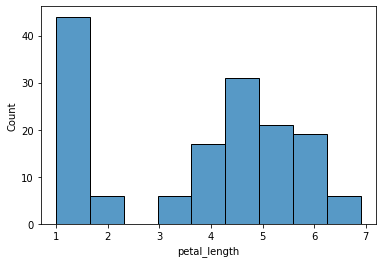

In [49]:
sns.histplot(iris.petal_length)

In [ ]:
# 2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

In [51]:
iris_corr = iris.corr()
iris_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [52]:
petal_lengthwidth = pd.crosstab(iris_corr.petal_length, iris_corr.petal_width)

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

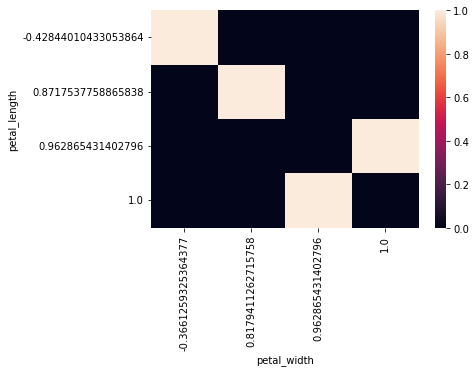

In [121]:
sns.heatmap(petal_lengthwidth, annot=False)

In [10]:
iris_tab = pd.crosstab(iris.petal_length , iris.petal_width)

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

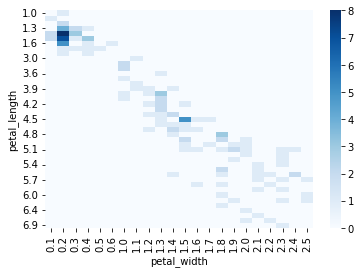

In [14]:
sns.heatmap(iris_tab, cmap = 'Blues', fmt = 'd')

In [ ]:
# 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

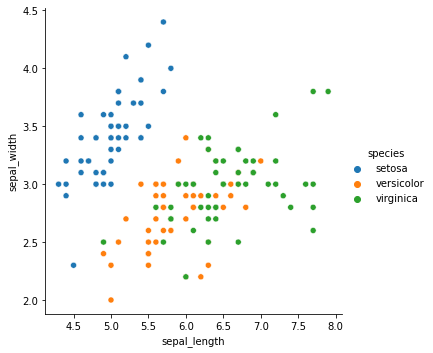

In [58]:
sns.relplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')

In [61]:
sepals_corr = pd.crosstab(iris.sepal_length, iris.sepal_width, normalize=True)

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

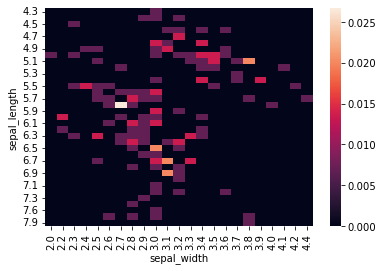

In [62]:
sns.heatmap(sepals_corr)

In [ ]:
# 4. Which features would be best used to predict species?

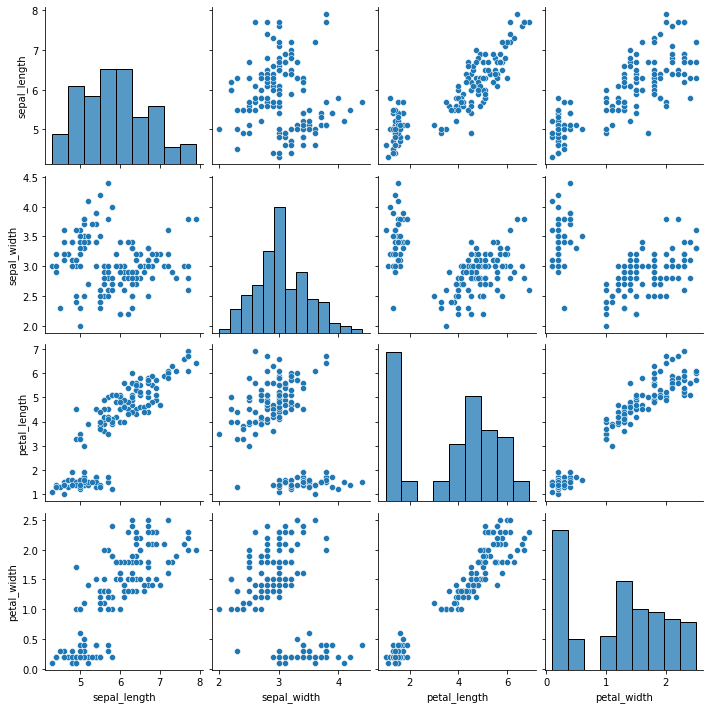

In [24]:
sns.pairplot(iris)

In [ ]:
# 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [26]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [67]:
anscombe.groupby('dataset').agg('count')

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


In [69]:
anscombe.columns

Index(['dataset', 'x', 'y'], dtype='object')

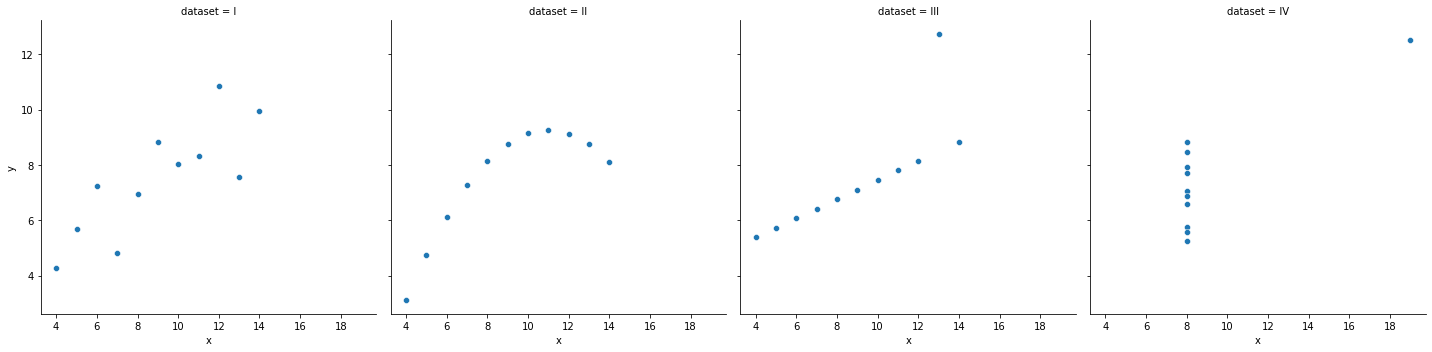

In [70]:
sns.relplot(data = anscombe, x = 'x', y = 'y', col = 'dataset')

In [ ]:
# 2.Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [74]:
insect_sprays = data("InsectSprays")
insect_sprays.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [75]:
from pydataset import data

InsectSprays = data('InsectSprays')
InsectSprays = data("InsectSprays",show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [76]:
insect_sprays.columns

Index(['count', 'spray'], dtype='object')

<AxesSubplot:xlabel='spray', ylabel='count'>

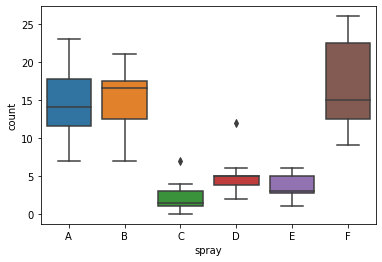

In [77]:
sns.boxplot(data=insect_sprays,y="count",x="spray")

In [ ]:
# 3.Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [119]:
swiss = data('swiss')
swiss = swiss.sort_values(by='Catholic')
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
La Vallee,54.3,15.2,31,20,2.15,10.8
Aubonne,66.9,67.5,14,7,2.27,19.1
Oron,72.5,71.2,12,1,2.40,21.0
Paysd'enhaut,72.0,63.5,6,3,2.56,18.0
Cossonay,61.7,69.3,22,5,2.82,18.7


In [44]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [ ]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [112]:
swiss['is_catholic'] = swiss.Catholic > 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
La Vallee,54.3,15.2,31,20,2.15,10.8,False
Aubonne,66.9,67.5,14,7,2.27,19.1,False
Oron,72.5,71.2,12,1,2.40,21.0,False
Paysd'enhaut,72.0,63.5,6,3,2.56,18.0,False
Cossonay,61.7,69.3,22,5,2.82,18.7,False


In [ ]:
# Does whether or not a province is Catholic influence fertility?

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

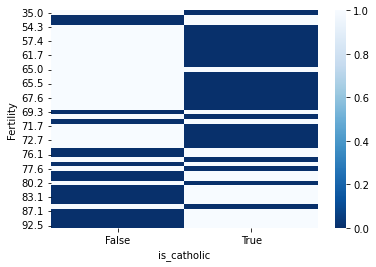

In [117]:
swiss_f_c = pd.crosstab(swiss.Fertility, swiss.is_catholic)
sns.heatmap(swiss_f_c, cmap = 'Blues_r')

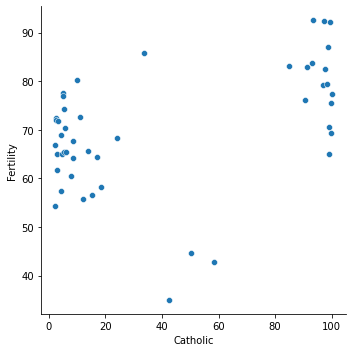

In [104]:
sns.relplot(data = swiss, x='Catholic', y='Fertility')

In [ ]:
# What measure correlates most strongly with fertility?

In [106]:
correlation_swiss = swiss.corr()
correlation_swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


<AxesSubplot:>

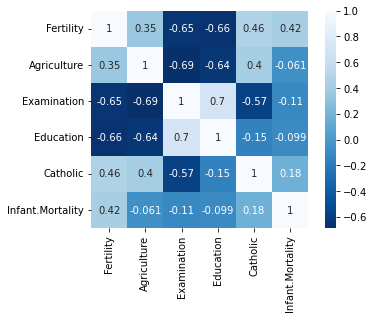

In [110]:
sns.heatmap(correlation_swiss, cmap = 'Blues_r', annot = True, square = True)